In [414]:
%load_ext autoreload
%autoreload 2

import re
import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading data

In [415]:
train_df = pd.read_csv('../data/train.csv', encoding='utf-8', warn_bad_lines=True, error_bad_lines=False)
test_df = pd.read_csv('../data/test.csv', encoding='utf-8', warn_bad_lines=True, error_bad_lines=False)

train_df[:3]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


## Preprocessing

In [416]:
EXTENDED_STRIP_REGEX = r'[!"#$%&()\*\+,-\./:;„”<=>?@\[\\\]^_`{|}~\']'
REMOVE_NUMERICAL = r'[0-9]'

def _preprocessing(txt: str) -> str:
    txt = txt.lower()
    txt = re.sub(EXTENDED_STRIP_REGEX, '', txt)
    txt = re.sub(REMOVE_NUMERICAL, '', txt)
    return txt

train_df['text_preproc'] = train_df['text'].apply(_preprocessing)

## Data split

In [417]:
X = train_df['text_preproc']
y = train_df['target']

X[:3]

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
Name: text_preproc, dtype: object

In [418]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:3]

4996    courageous and honest analysis of need to use ...
3263    zachzaidman thescore wld b a shame if that gol...
4907    tell barackobama to rescind medals of honor gi...
Name: text_preproc, dtype: object

## Vectorization

In [419]:
with open('../resources/stopwords_en.txt', encoding='utf-8') as f:
    stopwords = [line.rstrip() for line in f]

stopwords[:3]

['i', 'me', 'my']

In [420]:
vec = CountVectorizer(min_df=4, max_df=0.3)
vec.fit(X_train)
X_train_vec = vec.transform(X_train)
X_test_vec = vec.transform(X_test)

print(vec.get_feature_names())

['aba', 'abandoned', 'abbswinston', 'abc', 'abcnews', 'ability', 'ablaze', 'able', 'about', 'above', 'absolutely', 'abstorm', 'access', 'accident', 'accidentally', 'accidents', 'according', 'account', 'accused', 'acres', 'across', 'act', 'action', 'actions', 'activated', 'activates', 'actual', 'actually', 'add', 'added', 'admits', 'adult', 'advance', 'advisory', 'af', 'affected', 'afghan', 'afghanistan', 'afraid', 'africa', 'after', 'afternoon', 'aftershock', 'again', 'against', 'age', 'ago', 'agree', 'agreed', 'ah', 'ahead', 'aid', 'aim', 'aint', 'air', 'aircraft', 'airlines', 'airplane', 'airport', 'aka', 'al', 'alabama', 'alarm', 'alaska', 'alberta', 'album', 'alcohol', 'alert', 'alive', 'all', 'allah', 'alleged', 'allow', 'allowed', 'allows', 'almost', 'alone', 'along', 'alps', 'already', 'also', 'always', 'am', 'amazing', 'amazon', 'ambulance', 'america', 'american', 'americans', 'americas', 'amid', 'among', 'amongst', 'amp', 'amsterdam', 'an', 'analysis', 'ancient', 'and', 'angel

In [421]:
log_reg = LogisticRegression()
log_reg.fit(X_train_vec, y_train)

LogisticRegression()

In [422]:
print(log_reg.score(X_train_vec, y_train))
print(log_reg.score(X_test_vec, y_test))

0.9050903119868637
0.8089297439264609


[[767 107]
 [184 465]]
Normalized confusion matrix


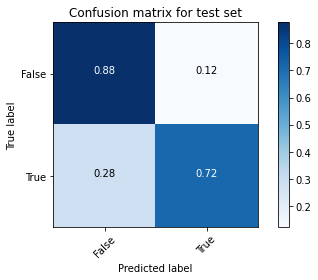

In [423]:
y_pred_test = log_reg.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred_test)

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix for test set',
                          cmap=plt.cm.Blues):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.print(classification_report(y_test, y_pred_test))
    """
    print(cm)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


plot_confusion_matrix(cm, [False, True])

In [424]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       874
           1       0.81      0.72      0.76       649

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



## Final model training

In [425]:
vec = CountVectorizer(min_df=4, max_df=0.3)
X_vec = vec.fit_transform(X)

log_reg = LogisticRegression()
log_reg.fit(X_vec, y)
log_reg.score(X_vec, y)

0.9043740969394457

In [426]:
test_df[:3]

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."


In [427]:
test_df['text_preproc'] = test_df['text'].apply(_preprocessing)
X_out = test_df['text_preproc']
X_out

0                      just happened a terrible car crash
1       heard about earthquake is different cities sta...
2       there is a forest fire at spot pond geese are ...
3                   apocalypse lighting spokane wildfires
4             typhoon soudelor kills  in china and taiwan
                              ...                        
3258    earthquake safety los angeles ûò safety faste...
3259    storm in ri worse than last hurricane my citya...
3260    green line derailment in chicago httptcoutbxlc...
3261    meg issues hazardous weather outlook hwo httpt...
3262    cityofcalgary has activated its municipal emer...
Name: text_preproc, Length: 3263, dtype: object

In [428]:
X_out_vec = vec.transform(X_out)
X_out_vec

<3263x3300 sparse matrix of type '<class 'numpy.int64'>'
	with 31597 stored elements in Compressed Sparse Row format>

In [429]:
y_out_pred = log_reg.predict(X_out_vec)
y_out_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [430]:
file = pd.DataFrame({
   'id': test_df['id'],
   'target': y_out_pred
})

file.to_csv('disaster-tweets.csv', index=False)